## Task 6.6 - Sourcing and Analyzing Time Series Data

This script contains the following:
1. Importing your libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Data

1 - Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'RgiWVP1jhxRmMePBbk1H'

In [3]:
# Import real median household income data 
data = quandl.get('FRED/MEHOINUSA672N')


In [4]:
data.head(5)

Value
Date               
1984-01-01  53337.0
1985-01-01  54334.0
1986-01-01  56291.0
1987-01-01  56964.0
1988-01-01  57433.0

In [5]:
data.shape

(37, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

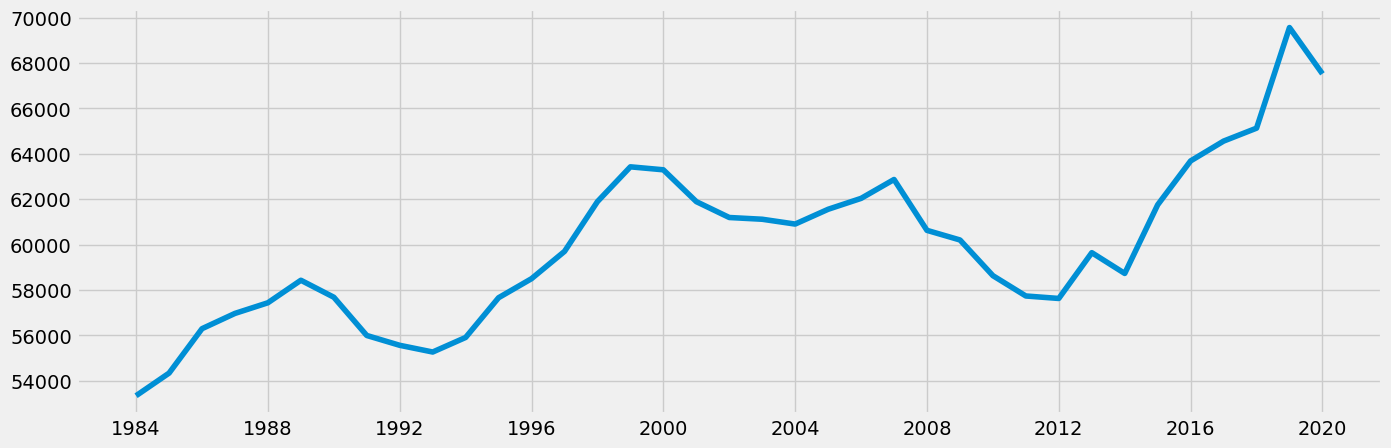

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization 
plt.plot(data)

2. Subsetting, wrangling, and cleaning time-series data

In [9]:
# Reset index so that the "Date" column is a filter

data_2 = data.reset_index()

In [10]:
data_2.head()

Date    Value
0 1984-01-01  53337.0
1 1985-01-01  54334.0
2 1986-01-01  56291.0
3 1987-01-01  56964.0
4 1988-01-01  57433.0

In [11]:
# Set the "Date" column as the index

from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['Date']) # Create a datetime column from "Date.""
data_2 = data_2.set_index('datetime') # Set the datetime as the index of the dataframe.
data_2.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_2.head()

Value
datetime           
1984-01-01  53337.0
1985-01-01  54334.0
1986-01-01  56291.0
1987-01-01  56964.0
1988-01-01  57433.0

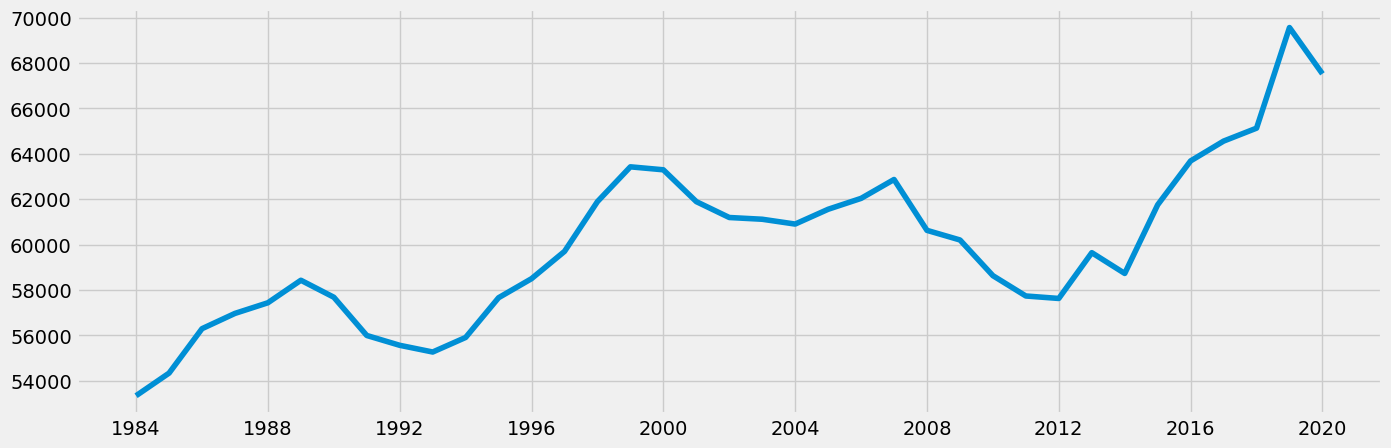

In [12]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_2)

In [13]:
# Check for missing values

data_2.isnull().sum() 

Value    0
dtype: int64

In [14]:
# Check for duplicates

dups = data_2.duplicated()
dups.sum()

# No duplicates

0

3. Time-series analysis: decomposition

In [15]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_2, model='additive')

In [16]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

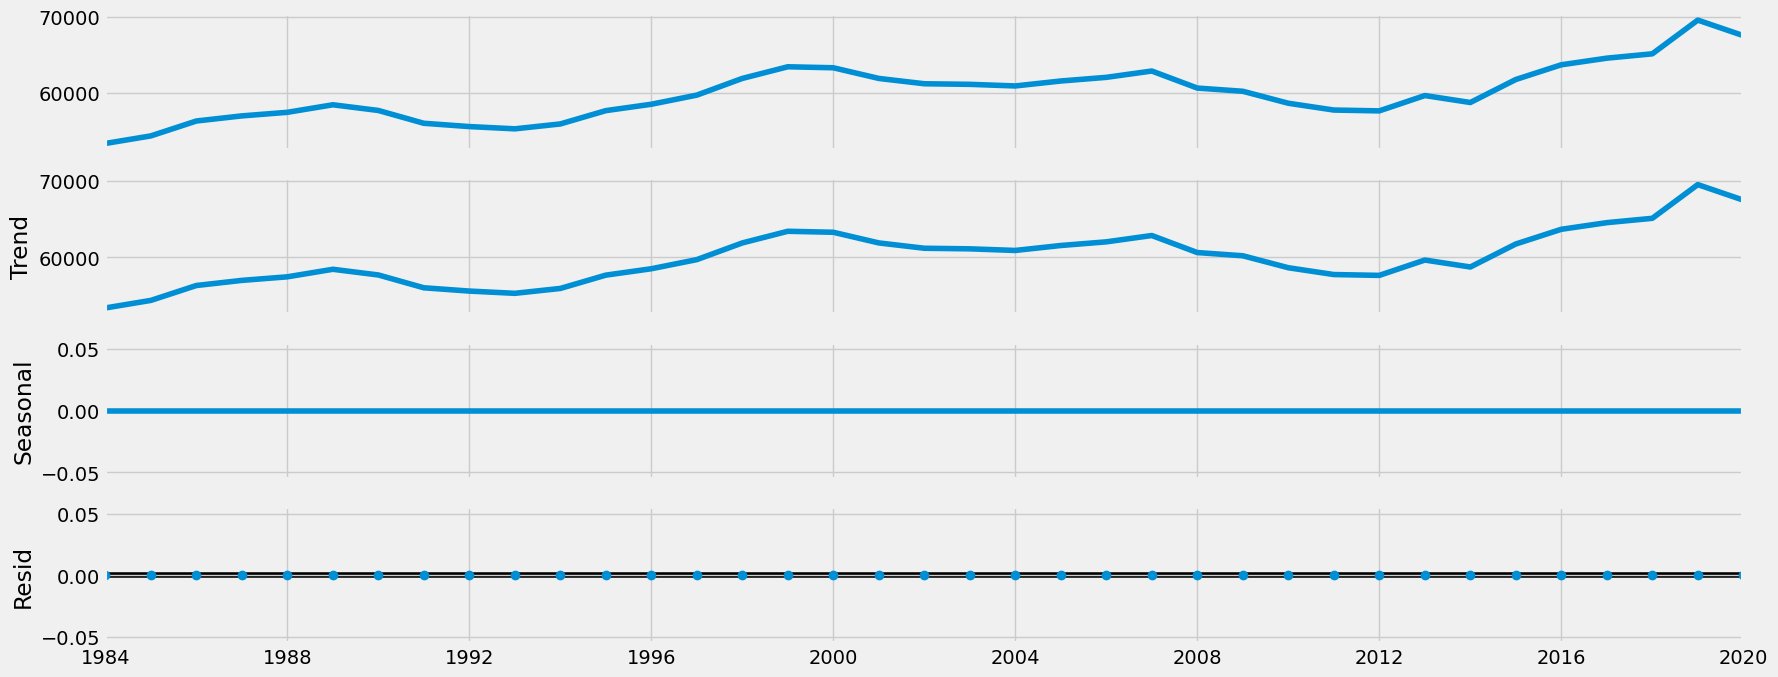

In [17]:
# Plot the separate components

decomposition.plot()
plt.show()

No seasonality becasue the data is yearly

In [18]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.066512
p-value                         0.728240
Number of Lags Used             7.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


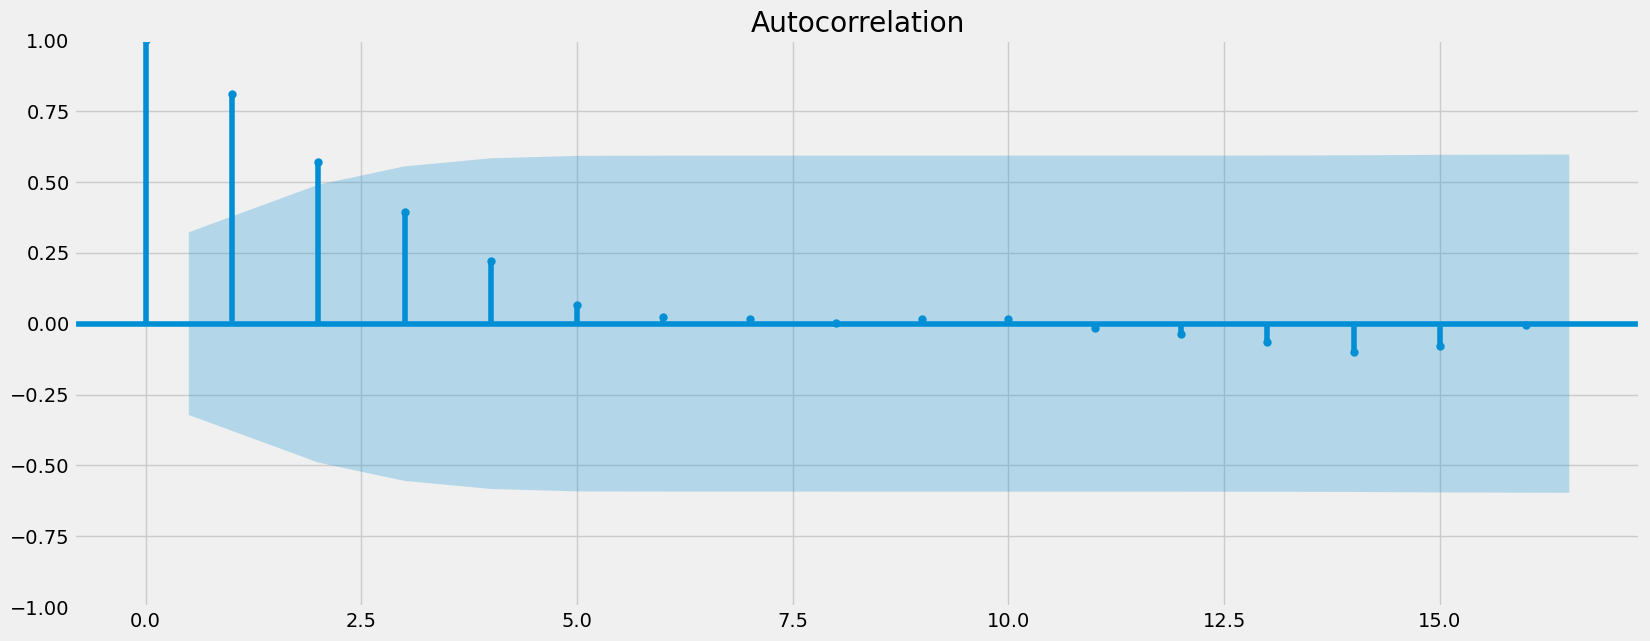

In [20]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_2)
plt.show()

# 5. Stationarizing the Mediian Houehold Income Data

In [21]:
data_diff = data_2 - data_2.shift(1)
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [23]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 


In [24]:
data_diff.head()

Value
datetime          
1985-01-01   997.0
1986-01-01  1957.0
1987-01-01   673.0
1988-01-01   469.0
1989-01-01   992.0

In [25]:
data_diff.columns

Index(['Value'], dtype='object')

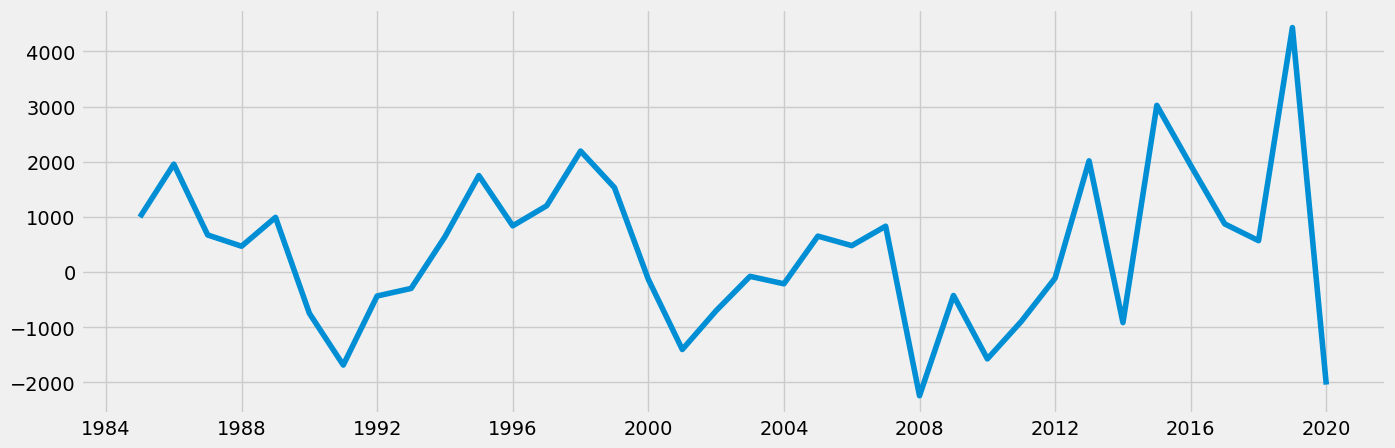

In [26]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [27]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.293123
p-value                         0.174196
Number of Lags Used             6.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


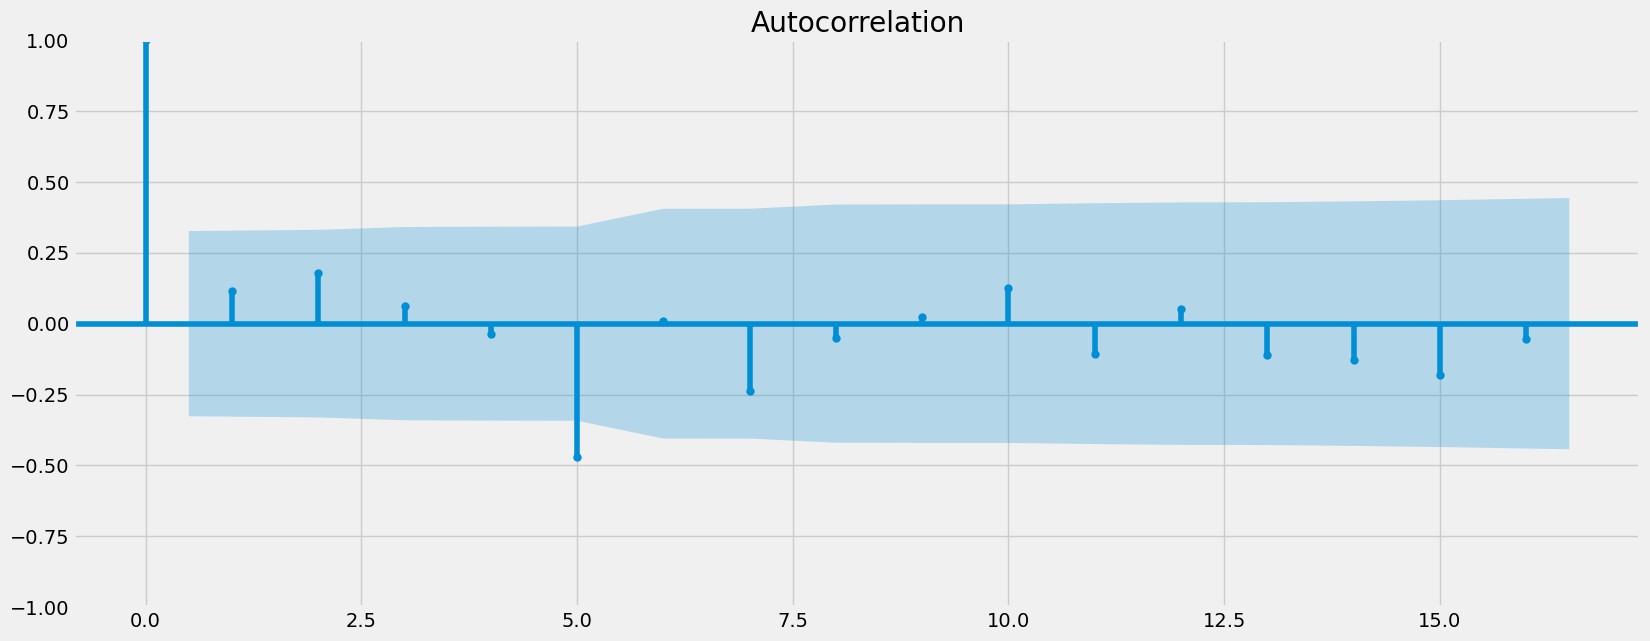

In [28]:
plot_acf(data_diff)
plt.show()

In [29]:
# Satationizing Try 2
data_diff_2 = data_diff - data_diff.shift(1)
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [30]:
data_diff_2.dropna(inplace = True)

In [32]:
data_diff_2.head()

Value
datetime          
1986-01-01   960.0
1987-01-01 -1284.0
1988-01-01  -204.0
1989-01-01   523.0
1990-01-01 -1740.0

In [33]:
data_diff_2.columns

Index(['Value'], dtype='object')

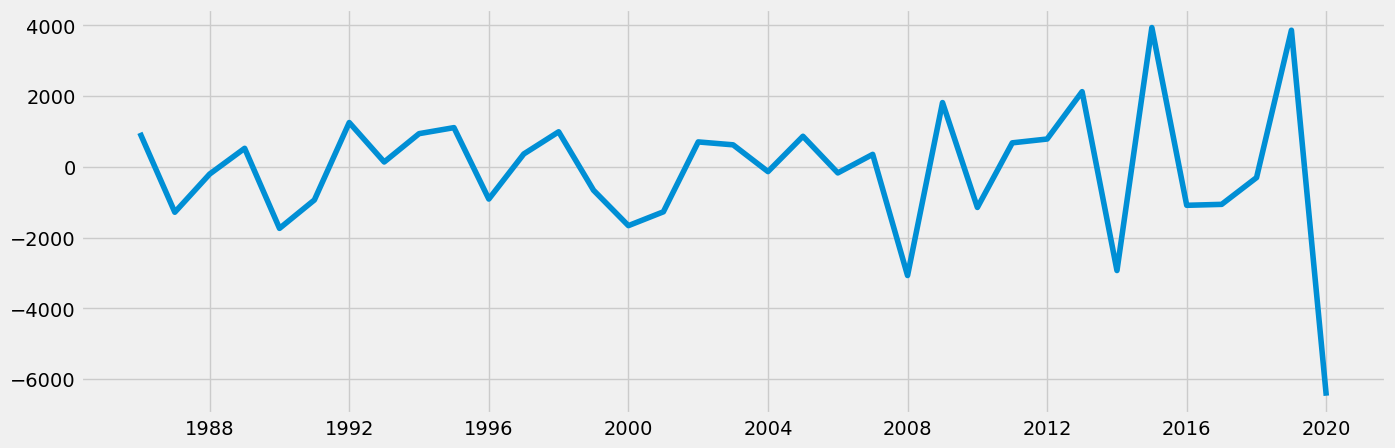

In [34]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [36]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.651639
p-value                         0.000104
Number of Lags Used             4.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


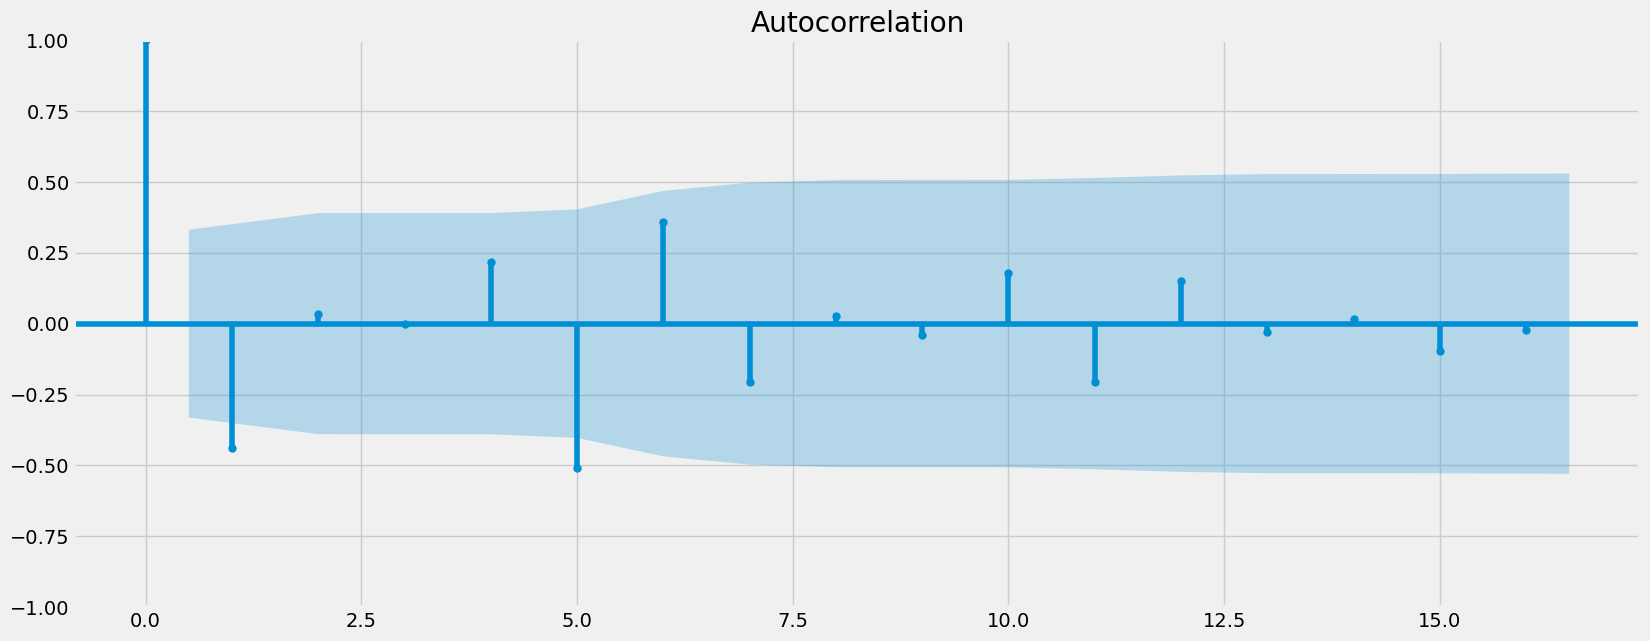

In [37]:
plot_acf(data_diff_2)
plt.show()

Data is now standerized, which means we can reject the null hypothosis